In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as skpp
import scipy.stats as stats
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re

from keras.models import Sequential
from keras.layers import BatchNormalization 
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint #we can control our model if going well during validation part or not
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam
import tensorflow as tf
import torch

import warnings
warnings.filterwarnings("ignore")

Data Pre-Processing

In [2]:
dataDf = pd.read_excel("data.xlsx", dtype=object)
columnNames = dataDf.columns

dataDf.dropna(inplace=True)
dataDf['GENDER'] = dataDf['GENDER'].replace(["Male", "Female"], [1,2])
for i in range(4, 43-9):
    dataDf = dataDf.astype({dataDf.columns[i]: str})

for i in range(len(dataDf)):
    row = dataDf.iloc[i]
    for c in range(4, 18):
        row[columnNames[c]] = row[columnNames[c]].strip(".")
        row[columnNames[c]] = row[columnNames[c]].split('.')
    dataDf.iloc[i] = row
for i in range(len(dataDf)):
    for c in range(4, 18):
        dataDf = dataDf.explode(columnNames[c])

dropList = ['Questioinnaire number ', 'AGE', 'HOME LANGUAGE']
dataDf = dataDf.drop(columns=dropList)

dataDf['PASSED'] = 0
dataDf.loc[dataDf['FNL ILS'] >= 50, 'PASSED'] = 1

columns = dataDf.columns

In [3]:
dataDf = dataDf.drop(columns=columns[31:40])

In [21]:
dataDf = dataDf.drop_duplicates()
dataDf = dataDf.dropna()
for c in dataDf.columns:
    dataDf[c] = pd.to_numeric(dataDf[c])

In [ ]:
miscDf = dataDf[columns[:7]]
miscDf['PASSED'] = dataDf['PASSED']
miscDf = miscDf.drop_duplicates()

In [ ]:
from sklearn.model_selection import train_test_split
trainDf, testDf = train_test_split(dataDf, test_size=0.2)

In [ ]:
print("Most important features relative to target")
CMtx = trainDf.corr()
CMtx.sort_values(['PASSED'], ascending=False, inplace=True)
print(CMtx['PASSED'][abs(CMtx['PASSED']) >= 0.1])

In [6]:
from sklearn.ensemble import RandomForestClassifier

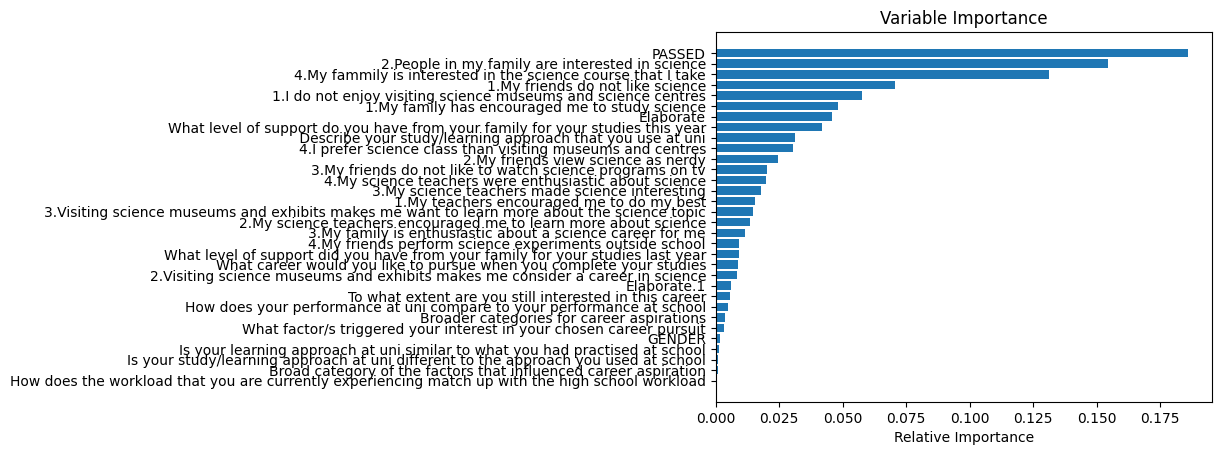

In [23]:
features = dataDf.columns
clf = RandomForestClassifier()
clf.fit(dataDf[features], dataDf['PASSED'])
importances = clf.feature_importances_
sortedIdx = np.argsort(importances)
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sortedIdx], align='center')
plt.yticks(padding, features[sortedIdx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [27]:
importances[sortedIdx]

array([1.30975558e-06, 7.74009621e-04, 1.02904362e-03, 1.40958384e-03,
       1.86560112e-03, 3.27276847e-03, 3.61315734e-03, 5.00757712e-03,
       5.71466207e-03, 6.10140696e-03, 8.46536930e-03, 8.82973142e-03,
       8.99380828e-03, 9.31567599e-03, 1.16859115e-02, 1.36150835e-02,
       1.48311486e-02, 1.56335609e-02, 1.76845671e-02, 1.98311035e-02,
       2.01005210e-02, 2.44427091e-02, 3.05796943e-02, 3.10621565e-02,
       4.19899022e-02, 4.56875420e-02, 4.81984185e-02, 5.76637391e-02,
       7.06766150e-02, 1.31366715e-01, 1.54556665e-01, 1.86000242e-01])